In [20]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import pandas as pd

df = pd.read_csv(r'cropped\200pLB_10022020_Ortho-0-0\IM-9999.csv')

In [21]:
df = pd.concat([df,pd.read_csv(r'cropped\200pLB_10022020_Ortho-0-1\IM-9999.csv'),
                pd.read_csv(r'cropped\200pLB_10022020_Ortho-0-2\IM-9999.csv'),
                pd.read_csv(r'cropped\200pLB_10022020_Ortho-0-3\IM-999.csv'),
                pd.read_csv(r'cropped\200pLB_10072021_Ortho-0-3\IM-999.csv'),
                pd.read_csv(r'cropped\200pLB_20201117_Ortho-0-0\IM-9999.csv'),
                pd.read_csv(r'cropped\200pLB_20201117_Ortho-0-1\IM-9999.csv')],ignore_index=True,axis=0)

df.head()

,R,G,B,Im_Positions,Labels
0,170.549700,167.216100,167.216100,0,1
1,172.795050,166.390050,166.390050,1,1
2,89.286125,101.707550,101.707550,2,1
3,167.917825,167.634725,167.634725,3,1
4,30.564050,30.955525,30.955525,4,-1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79724 entries, 0 to 79723
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   R             79724 non-null  float64
 1   G             79724 non-null  float64
 2   B             79724 non-null  float64
 3   Im_Positions  79724 non-null  int64  
 4   Labels        79724 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 3.0 MB


In [23]:
from sklearn.cluster import KMeans

km =KMeans(n_clusters=2, n_init='auto')


km.fit(df[['R','G','B']]/255.0)

KMeans(n_clusters=2, n_init='auto')

In [24]:
km.inertia_

2518.755514148451

In [25]:
km.cluster_centers_

array([[0.66792535, 0.66686824, 0.66686824],
       [0.30333234, 0.35247166, 0.35247166]])

In [26]:
img = mpl.image.imread(r'shore.jpg')
x = img.reshape(-1,3)

segmented_image = km.cluster_centers_[km.predict(x/255.0)]

segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image);
plt.title('clustered');

c:\Users\roy_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [1]:
import joblib

# joblib.dump(km,r'model\Kmeans.joblib')

model = joblib.load(r'model\Kmeans.joblib')



In [2]:
model.cluster_centers_*255.0,model.cluster_centers_

(array([[170.38213589, 170.10635851, 170.10635851],
        [ 77.41452112,  89.933923  ,  89.933923  ]]),
 array([[0.66816524, 0.66708376, 0.66708376],
        [0.30358636, 0.35268205, 0.35268205]]))

c:\Users\roy_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


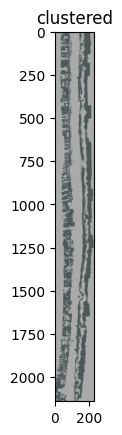

In [3]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import pandas as pd
img = mpl.image.imread(r'Data\transformed\LB_09182020_Ortho.jpg')
x = img.reshape(-1,3)

segmented_image = model.cluster_centers_[model.predict(x/255.0)]

segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image);
plt.title('clustered');

In [4]:
plt.imsave(r'output.jpg',segmented_image)

In [ ]:
# import numpy as np
# model.predict(np.array([[255,255,255],[0,0,0],[255,0,0],[0,0,255],[0,255,150],[150,255,255]])/255.0)

c:\Users\roy_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 1, 1, 1, 0, 0])

In [ ]:
# img.shape,x.shape

((2141, 225, 3), (481725, 3))

In [ ]:
# model.predict(x/255.0).shape

c:\Users\roy_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


(481725,)

In [5]:
m,n,_ = img.shape
m,n

(2141, 225)

In [6]:
y = model.predict(x/255.0)
y = y.reshape(m,n)

c:\Users\roy_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [7]:
_y = y
for i in range(m):
    # left correction 
    for j in range(0,int(n*0.48)):
       if _y[i][j]==1:
           _y[i][j]= 0
    for j in range(int(n*0.7),n):
        if _y[i][j]==0:
            _y[i][j]= 1

In [8]:
y.shape

(2141, 225)

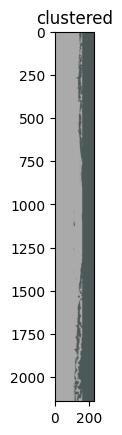

In [9]:
img = mpl.image.imread(r'Data\transformed\LB_09182020_Ortho.jpg')
_y.reshape(-1,1)
segmented_image = model.cluster_centers_[_y]

segmented_image = segmented_image.reshape(img.shape)

plt.imshow(segmented_image);
plt.title('clustered');

In [10]:
plt.imsave('output.jpg',segmented_image)

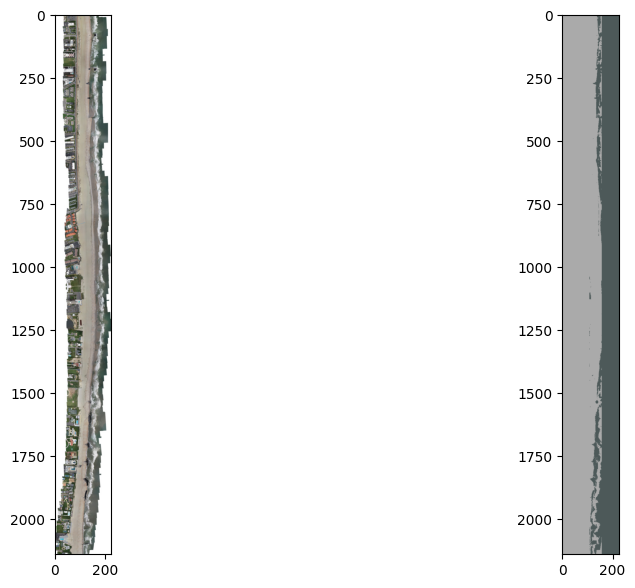

In [11]:
fig, axes = plt.subplots(1,2,figsize=(12,7))

axes[0].imshow(img)
axes[1].imshow(segmented_image)

In [12]:
import numpy as np
final = pd.DataFrame(x,columns=['R','G','B'])

In [13]:
final

,R,G,B
0,255,255,255
1,255,255,255
2,255,255,255
3,255,255,255
4,255,255,255
...,...,...,...
481720,255,255,255
481721,255,255,255
481722,255,255,255
481723,255,255,255


In [15]:
_y.reshape(m*n)

array([0, 0, 0, ..., 1, 1, 1])

In [17]:

labels = pd.Series(_y.reshape(m*n),name='label')

final = pd.concat([final,labels],axis=1)

final.head()

,R,G,B,label
0,255,255,255,0
1,255,255,255,0
2,255,255,255,0
3,255,255,255,0
4,255,255,255,0


In [18]:
final['label'].unique()

array([0, 1])

In [20]:
final

,R,G,B,label
0,255,255,255,0
1,255,255,255,0
2,255,255,255,0
3,255,255,255,0
4,255,255,255,0
...,...,...,...,...
481720,255,255,255,1
481721,255,255,255,1
481722,255,255,255,1
481723,255,255,255,1


In [21]:
pos =[]

for i in range(m):
    for j in range(n):
        pos.append([i,j])

In [22]:
posdf = pd.DataFrame(pos,columns=['xPos','yPos'])

In [23]:
final = pd.concat([final,posdf],axis=1)
final

,R,G,B,label,xPos,yPos
0,255,255,255,0,0,0
1,255,255,255,0,0,1
2,255,255,255,0,0,2
3,255,255,255,0,0,3
4,255,255,255,0,0,4
...,...,...,...,...,...,...
481720,255,255,255,1,2140,220
481721,255,255,255,1,2140,221
481722,255,255,255,1,2140,222
481723,255,255,255,1,2140,223


In [24]:
final

,R,G,B,label,xPos,yPos
0,255,255,255,0,0,0
1,255,255,255,0,0,1
2,255,255,255,0,0,2
3,255,255,255,0,0,3
4,255,255,255,0,0,4
...,...,...,...,...,...,...
481720,255,255,255,1,2140,220
481721,255,255,255,1,2140,221
481722,255,255,255,1,2140,222
481723,255,255,255,1,2140,223


In [25]:
final.columns

Index(['R', 'G', 'B', 'label', 'xPos', 'yPos'], dtype='object')

In [26]:
final[['R','G','B']] = final[['R','G','B']]/255.0

In [27]:
final

,R,G,B,label,xPos,yPos
0,1.0,1.0,1.0,0,0,0
1,1.0,1.0,1.0,0,0,1
2,1.0,1.0,1.0,0,0,2
3,1.0,1.0,1.0,0,0,3
4,1.0,1.0,1.0,0,0,4
...,...,...,...,...,...,...
481720,1.0,1.0,1.0,1,2140,220
481721,1.0,1.0,1.0,1,2140,221
481722,1.0,1.0,1.0,1,2140,222
481723,1.0,1.0,1.0,1,2140,223


In [28]:
from sklearn.svm import SVC


svc = SVC()


svc.fit(final[['R', 'G', 'B','xPos','yPos']],final['label'])

SVC()

In [29]:
preds = svc.predict(final[['R', 'G', 'B','xPos','yPos']])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(final['label'],preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    310950
           1       0.93      0.94      0.94    170775

    accuracy                           0.96    481725
   macro avg       0.95      0.95      0.95    481725
weighted avg       0.96      0.96      0.96    481725



In [31]:
svc.kernel

'rbf'

In [44]:
joblib.dump(svc,r'model\svc.joblib')

['model\\svc.joblib']

In [32]:
preds.shape

(481725,)

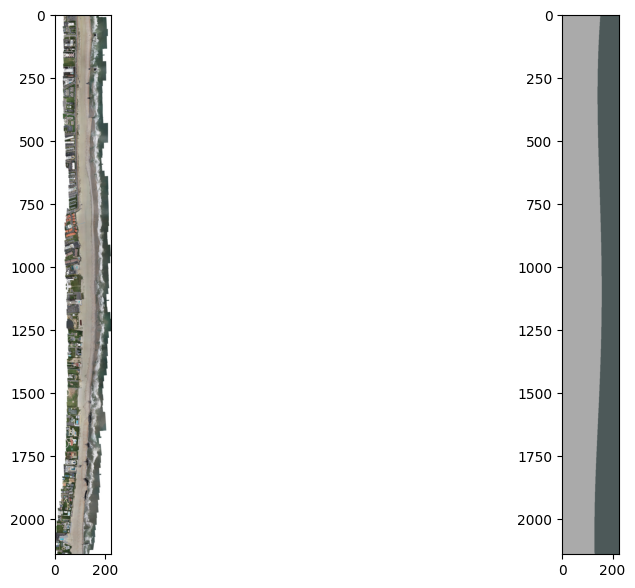

In [33]:
img = mpl.image.imread(r'Data\transformed\LB_09182020_Ortho.jpg')
_y.reshape(-1,1)
segmented_image = model.cluster_centers_[preds]

segmented_image = segmented_image.reshape(img.shape)

fig, axes = plt.subplots(1,2,figsize=(12,7))

axes[0].imshow(img)
axes[1].imshow(segmented_image)

c:\Users\roy_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


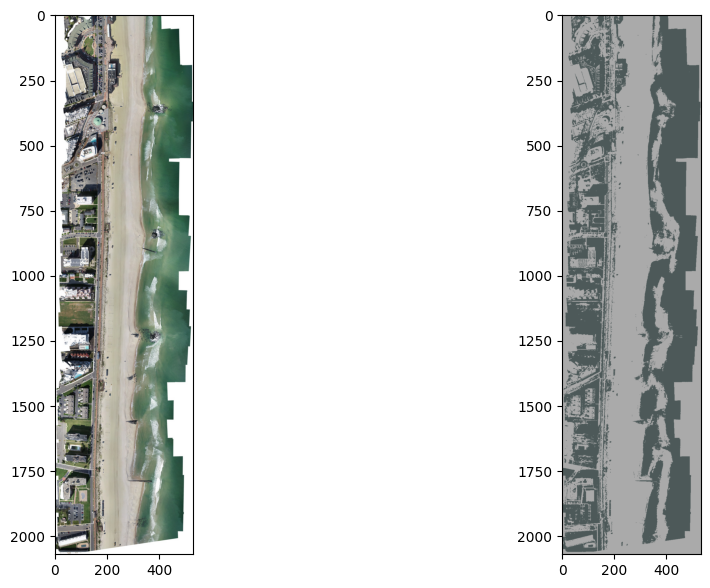

In [34]:
img = mpl.image.imread(r'Data/transformed/LB_10022020_Ortho-0-0.jpg')
x = img.reshape(-1,3)

segmented_image = model.cluster_centers_[model.predict(x/255.0)]

segmented_image = segmented_image.reshape(img.shape)

fig, axes = plt.subplots(1,2,figsize=(12,7))

axes[0].imshow(img)
axes[1].imshow(segmented_image)

In [35]:
m, n, _ = img.shape
m,n

(2070, 532)

In [36]:
y = model.predict(x/255.0)
y = y.reshape(m,n)

c:\Users\roy_3\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [37]:
for i in range(m):
    # left correction 
    for j in range(0,int(n*0.48)):
       if y[i][j]==1:
           y[i][j]= 0
    for j in range(int(n*0.7),n):
        if y[i][j]==0:
            y[i][j]= 1

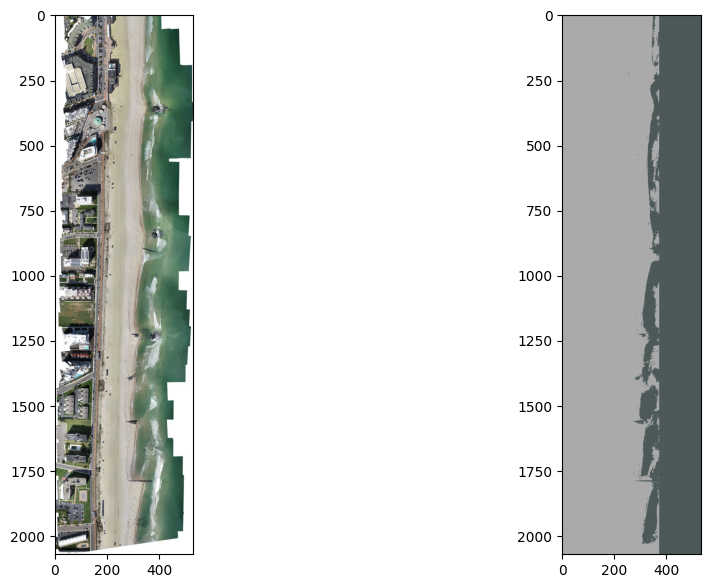

In [38]:
segmented_image = model.cluster_centers_[y]

segmented_image = segmented_image.reshape(img.shape)

fig, axes = plt.subplots(1,2,figsize=(12,7))

axes[0].imshow(img)
axes[1].imshow(segmented_image)

In [39]:
img.shape

(2070, 532, 3)

In [40]:
test = pd.DataFrame(x,columns=['R','G','B'])
labels = pd.Series(y.reshape(m*n),name='label')

test = pd.concat([test,labels],axis=1)
pos =[]

for i in range(m):
    for j in range(n):
        pos.append([i,j])

posdf = pd.DataFrame(pos,columns=['xPos','yPos'])
test = pd.concat([test,posdf],axis=1)
test


,R,G,B,label,xPos,yPos
0,255,255,255,0,0,0
1,255,255,255,0,0,1
2,255,255,255,0,0,2
3,255,255,255,0,0,3
4,255,255,255,0,0,4
...,...,...,...,...,...,...
1101235,255,255,255,1,2069,527
1101236,255,255,255,1,2069,528
1101237,255,255,255,1,2069,529
1101238,255,255,255,1,2069,530


In [48]:
test[['R','G','B']]= test[['R','G','B']]/255.0

In [49]:
preds =svc.predict(test[['R', 'G', 'B','xPos','yPos']])

In [58]:
model.cluster_centers_,svc.decision_function(test[['R', 'G', 'B','xPos','yPos']])

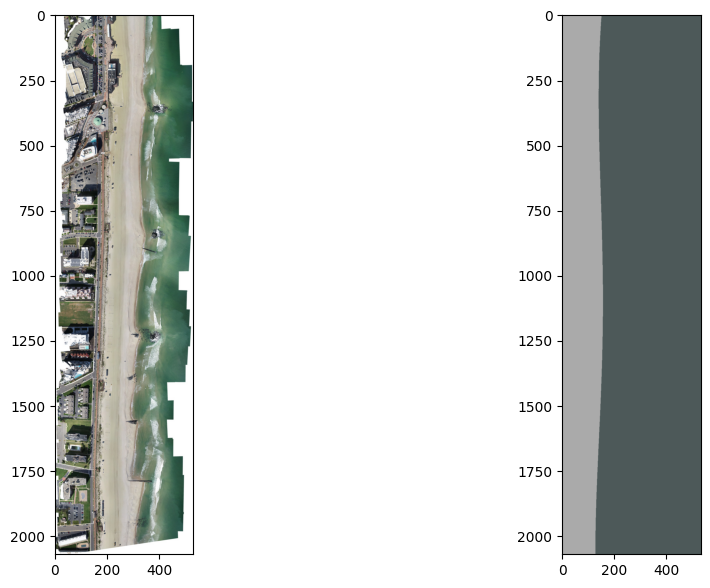

In [50]:
segmented_image = model.cluster_centers_[preds]
segmented_image = segmented_image.reshape(img.shape)

fig, axes = plt.subplots(1,2,figsize=(12,7))

axes[0].imshow(img)
axes[1].imshow(segmented_image)


In [51]:
print(classification_report(test['label'],preds))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60    703355
           1       0.50      1.00      0.66    397885

    accuracy                           0.63   1101240
   macro avg       0.75      0.71      0.63   1101240
weighted avg       0.82      0.63      0.62   1101240



In [1]:
def labeller(img):
    m,n,_ = img.shape
    df = pd.DataFrame(img.reshape(-1,3),columns=['R','G','B'])
    df = df/255.0
    labels = model.predict(df)
    labels = labels.reshape(m,n)
    pos = []
    for i in range(m):
    # left correction 
        for j in range(0,int(n*0.45)):
            if labels[i][j]==1:
                labels[i][j]= 0
        for j in range(int(n*0.80),n):
            if labels[i][j]==0:
                labels[i][j]= 1
    labels = pd.Series(labels.reshape(m*n),name='label')
    df = pd.concat([df,labels],axis=1)
    for i in range(m):
        for j in range(n):
            pos.append([i,j])

    posdf = pd.DataFrame(pos,columns=['xPos','yPos'])
    df = pd.concat([df,posdf],axis=1)
    return df

import joblib
model = joblib.load(r'model\Kmeans.joblib')
    

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd
import joblib


In [3]:
img = mpl.image.imread(r'Data\transformed\LB_08192022_Ortho-0-1.jpg')
df = labeller(img)
df = pd.concat([df,
                labeller(mpl.image.imread(r'Data\transformed\LB_08192022_Ortho-0-2.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_08192022_Ortho-0-3.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_09182020_Ortho.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_10022020_Ortho-0-0.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_10022020_Ortho-0-1.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_10022020_Ortho-0-2.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_11032021_Ortho-0-0.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_11032021_Ortho-0-1.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_11032021_Ortho-0-2.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_11032021_Ortho-0-3.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_12212022_ortho-0-0.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_12212022_ortho-0-1.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_12212022_ortho-0-2.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_12212022_ortho-0-3.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_20201117_Ortho-0-0.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_20201117_Ortho-0-1.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_20201117_Ortho-0-2.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_20230707_Ortho-0-0.jpg')),
                labeller(mpl.image.imread(r'Data\transformed\LB_20230707_Ortho-0-2.jpg'))],axis=0,ignore_index=True)
df.head()

,R,G,B,label,xPos,yPos
0,0.988235,1.000000,1.000000,0,0,0
1,0.988235,0.992157,1.000000,0,0,1
2,1.000000,1.000000,1.000000,0,0,2
3,1.000000,0.996078,1.000000,0,0,3
4,1.000000,0.992157,0.996078,0,0,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371000 entries, 0 to 370999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   R       371000 non-null  float64
 1   G       371000 non-null  float64
 2   B       371000 non-null  float64
 3   label   371000 non-null  int32  
 4   xPos    371000 non-null  int64  
 5   yPos    371000 non-null  int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 15.6 MB


In [5]:
df.columns

Index(['R', 'G', 'B', 'label', 'xPos', 'yPos'], dtype='object')

In [6]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(df[['R', 'G', 'B','xPos', 'yPos']],df['label'])

SVC()

In [7]:
joblib.dump(svc,r'model\svc2.joblib')

['model\\svc2.joblib']

In [8]:
test = mpl.image.imread(r'Data\transformed\Ortho_12152020_new-0-0.jpg')
df_test = labeller(test)
preds = svc.predict(df_test[['R', 'G', 'B','xPos', 'yPos']])

Text(0.5, 1.0, 'SVC')

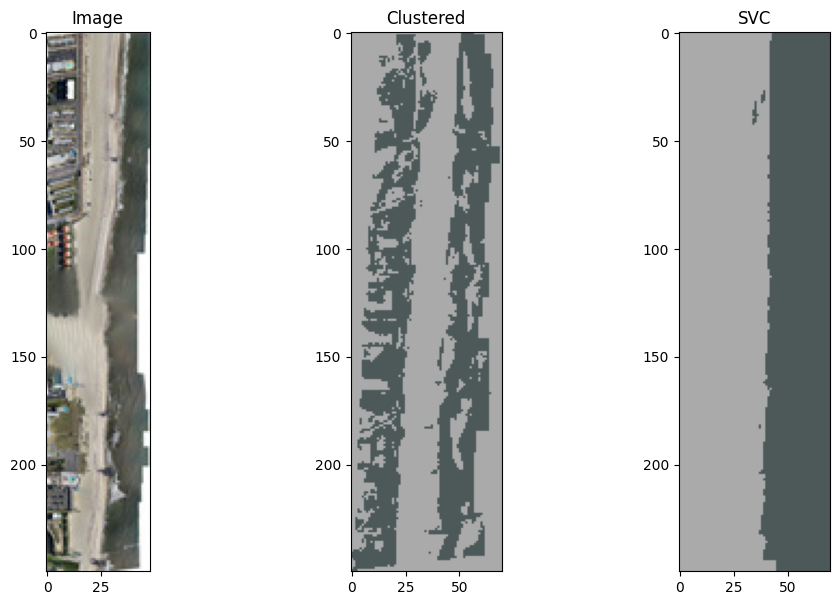

In [22]:
# from the downscaled images the svc was trained on only 20 out of the 27 images
# and tested on 1 of the remaining 27

segmented_image = model.cluster_centers_[preds]
segmented_image = segmented_image.reshape(test.shape)
m,n,_ = test.shape
cluster = model.predict(df_test[['R','G','B']])
clustered_img = model.cluster_centers_[cluster.reshape(m,n)]


fig, axes = plt.subplots(1,3,figsize=(12,7))

axes[0].imshow(img)
axes[1].imshow(clustered_img)
axes[2].imshow(segmented_image)

axes[0].set_title('Image')
axes[1].set_title('Clustered')
axes[2].set_title('SVC')


In [23]:
from sklearn.metrics import classification_report
print(classification_report(df_test['label'],preds))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     11736
           1       0.77      0.97      0.86      5764

    accuracy                           0.90     17500
   macro avg       0.88      0.91      0.89     17500
weighted avg       0.91      0.90      0.90     17500

